# Introduction to EDA

Exploratory Data Analysis (EDA) is the first and most essential step in any data science project. 
It involves summarizing the main characteristics of a dataset using **statistical summaries and visualizations**.
EDA helps to:
- Understand data structure
- Detect outliers and anomalies
- Identify patterns and correlations
- Guide feature selection and preprocessing steps

This notebook provides an in-depth introduction to EDA techniques with **real-world examples**.

## Index
1. [EDA Overview](#1-eda-overview)
   1. [Statistical Summaries](#11-statistical-summaries)
   2. [Visualization techniques](#21-visualization-techniques)
2. [Missing values](#3-detecting-missing-values)
3. [Outliers](#4-outliers)
4. [Correlation analysis](#5-correlation-analysis)
5. [Extra Resources](#6-extra-resources)


**Libraries used:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

## 1. EDA Overview and Insights

EDA consists of **descriptive statistics** (for numerical data) and **visualizations** that provide insights into the dataset. We typically start by loading the data and checking its structure:

In [2]:
df = sns.load_dataset("titanic")
print("Dataset Overview:")
print(df.head())
print("\nData Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  

### 1.1 Statistical Summaries

For numerical data, we tipically look for:
- **Mean** (average)
- **Median** (middle value)
- **Standard Deviation** (spread of data)
- **Skewness & Kurtosis** (shape of distribution)

In [3]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### 1.2 Visualization Techniques

Visualising data helps identify trends, patterns, and anomalies.
Common visualisation methods include:
- **Histograms** (distribution of numerical data)
- **Boxplots** (detecting outliers)
- **Scatterplots** (relationships between variables)
- **Bar Charts** (categorical data distribution)

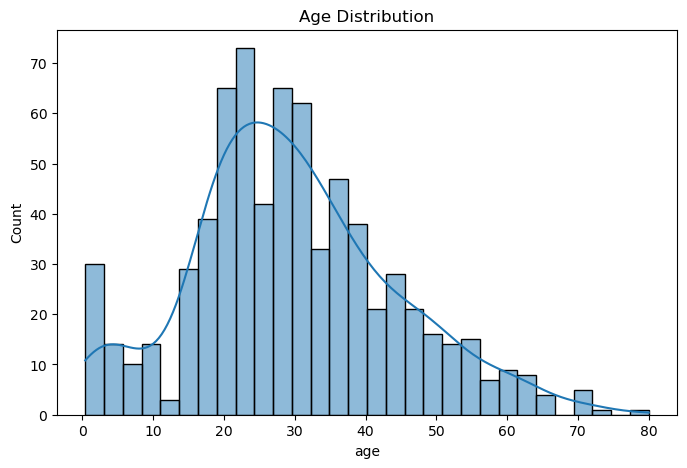

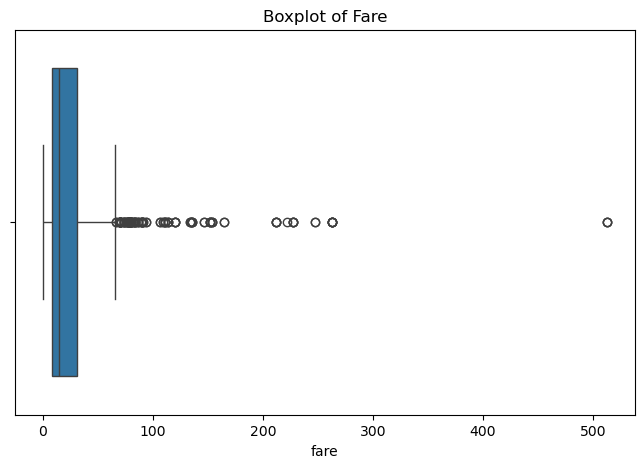

In [4]:
# Histogram for Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot for Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fare"])
plt.title("Boxplot of Fare")
plt.show()

## 3. Detecting Missing Values

Missing data can bias results and reduce model performance. We use:
- **Missing Value Counts** (`df.isnull().sum()`)
- **Missingno Library** (visual missing patterns)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


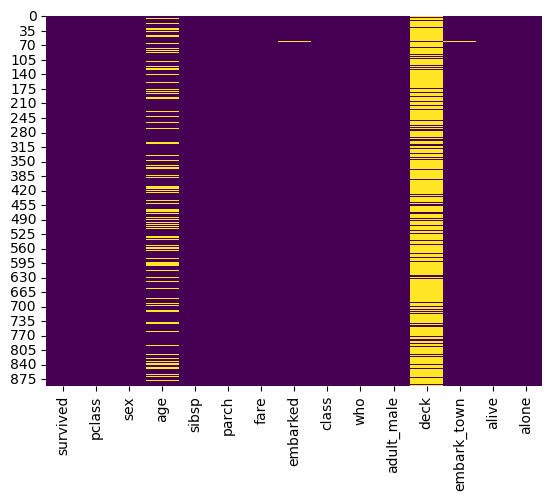

In [7]:
# Check for Missing Values
print(df.isnull().sum())

# Visualizing Missing Data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

## 4. Outliers
Outliers can be detected using:
- **Boxplots** (extreme values)
- **Z-score method** (values beyond 3 standard deviations)
- **Interquartile Range (IQR)**

In [8]:
# Detecting Outliers using IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['fare'] < (Q1 - 1.5 * IQR)) | (df['fare'] > (Q3 + 1.5 * IQR))]
print(f"Number of Outliers in Fare: {outliers.shape[0]}")

Number of Outliers in Fare: 116


## 5. Correlation Analysis
Correlation helps understand the relationship between numerical variables (and can also include categorical once they are encoded). We use:
- **Correlation Matrix** (Pearson correlation)
- **Heatmaps** (visual representation)

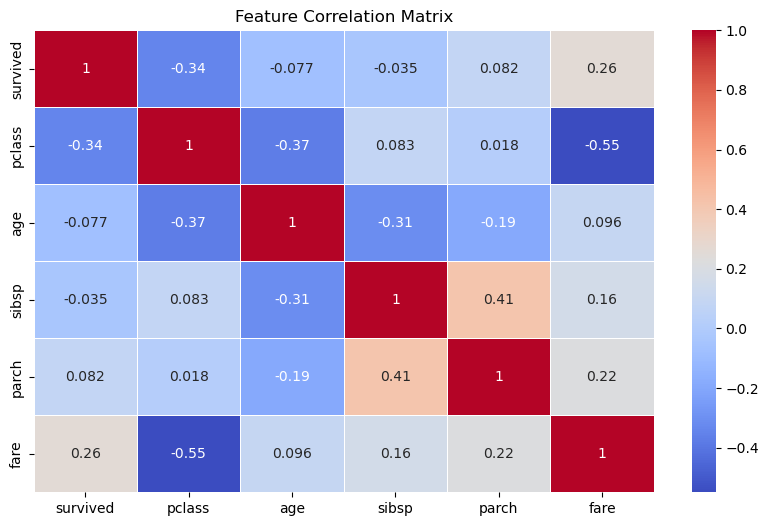

In [10]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## 6. Extra resources

For further reading:
- [Khan Academy: Statistics & Data Analysis](https://www.khanacademy.org/math/statistics-probability)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Towards Data Science: Exploratory Data Analysis](https://towardsdatascience.com/exploratory-data-analysis)